# Hungarian Chickenpox

Regression task from the UCI ML repository

https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [2]:
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\hungarian chickenpox'

In [3]:
df = pd.read_csv(dirpath+'/hungary_chickenpox.csv', index_col='Date', parse_dates=['Date'], dayfirst=True)
df.head(10)

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
Date,,,,,,,,,,,,,,,,,,,,
2005-01-03,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
2005-01-10,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
2005-01-17,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
2005-01-24,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
2005-01-31,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60
2005-02-07,174,76,77,152,189,26,74,181,157,44,95,97,26,146,59,54,27,54,48,60
2005-02-14,153,103,54,192,148,65,100,118,129,40,88,56,10,119,104,85,20,32,153,70
2005-02-21,115,74,64,174,140,56,111,175,138,60,112,70,21,178,70,75,5,66,149,54
2005-02-28,119,86,57,171,90,65,118,105,194,60,67,46,12,112,116,76,22,45,102,42


In [4]:
city = 'BUDAPEST'

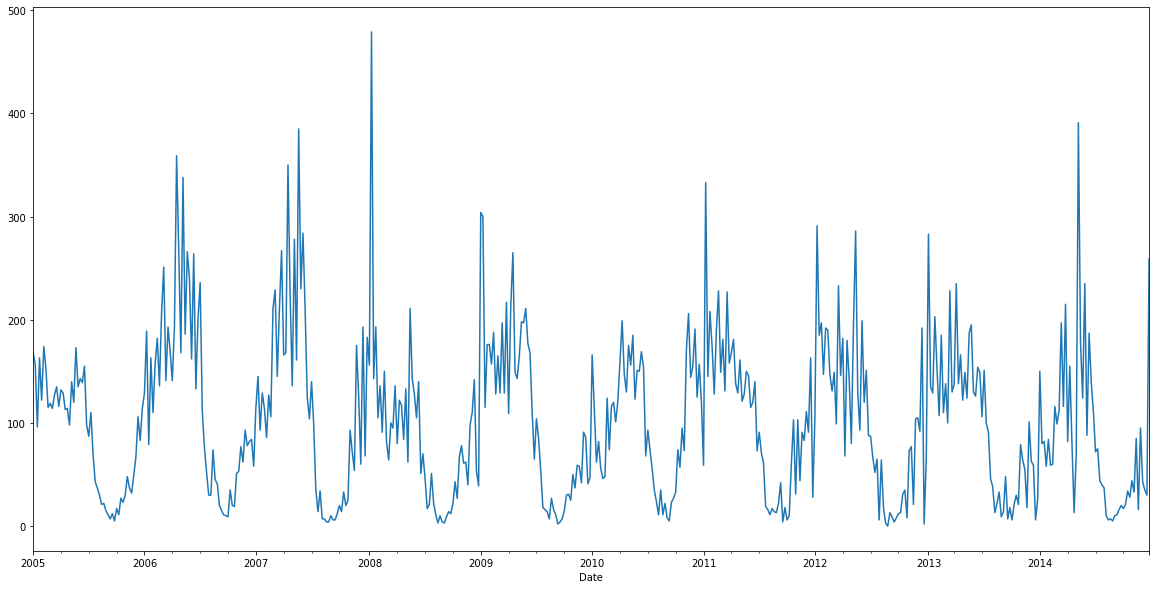

In [5]:
df[city].plot(figsize=(20,10))

In [6]:
np.mean(df[city])

101.24521072796935

In [7]:
# n day moving average
df['n28'] = df[city].rolling(28, min_periods=1, center=True).mean()
df['n14'] = df[city].rolling(14, min_periods=1, center=True).mean()
df['n7'] = df[city].rolling(7, min_periods=1, center=True).mean()
df['n3'] = df[city].rolling(3, min_periods=1, center=True).mean()

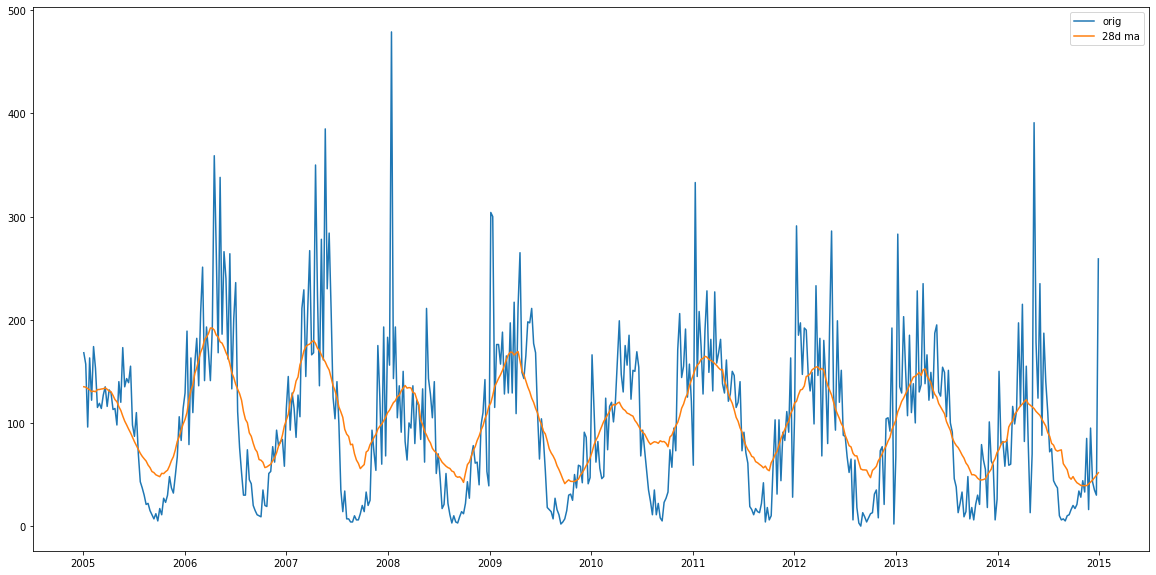

In [8]:
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df[city], label='orig')
ax.plot(df.index, df['n28'], label='28d ma')
plt.legend(loc='best')

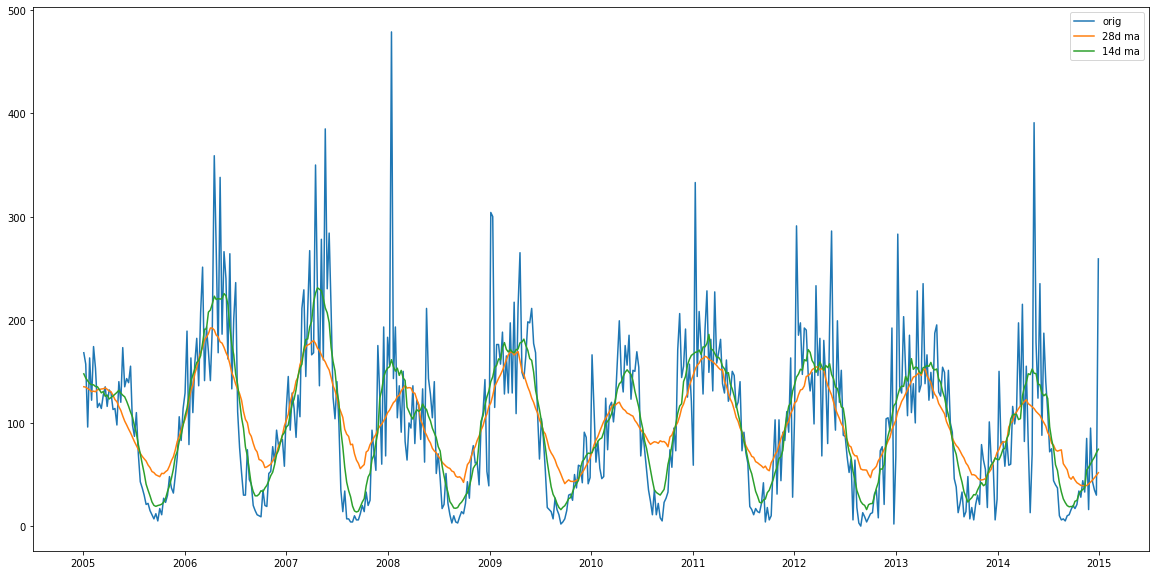

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df[city], label='orig')
ax.plot(df.index, df['n28'], label='28d ma')
ax.plot(df.index, df['n14'], label='14d ma')
plt.legend(loc='best')

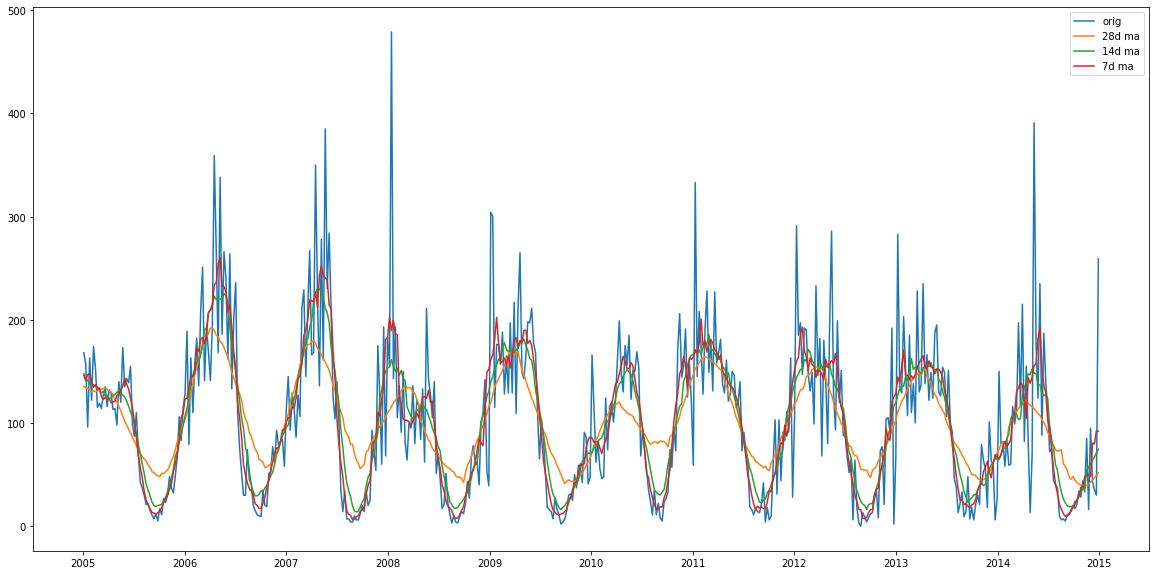

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df[city], label='orig')
ax.plot(df.index, df['n28'], label='28d ma')
ax.plot(df.index, df['n14'], label='14d ma')
ax.plot(df.index, df['n7'], label='7d ma')
plt.legend(loc='best')

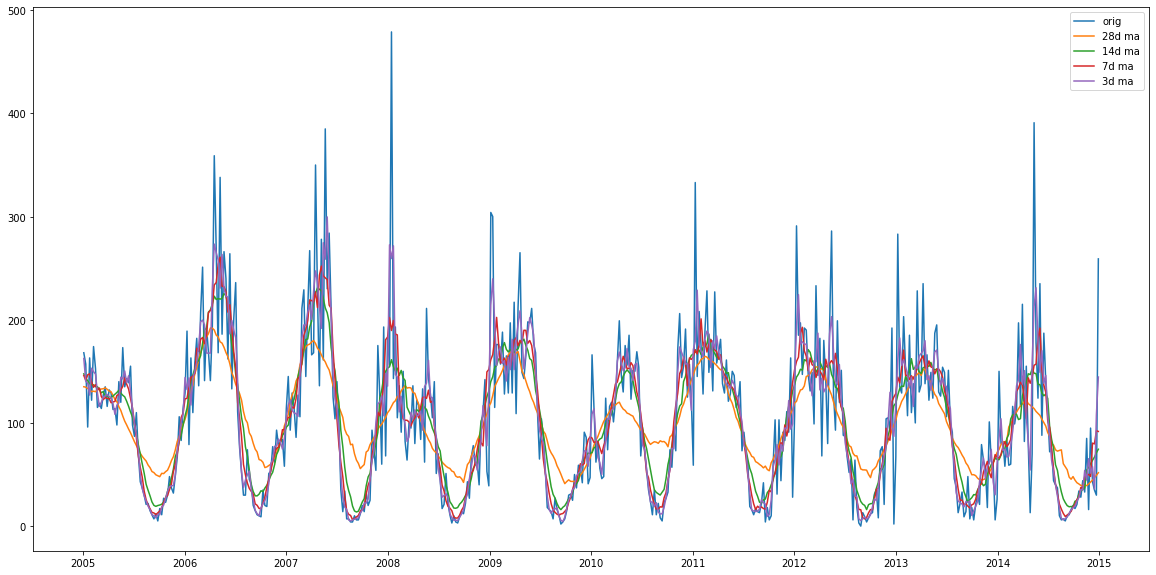

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df[city], label='orig')
ax.plot(df.index, df['n28'], label='28d ma')
ax.plot(df.index, df['n14'], label='14d ma')
ax.plot(df.index, df['n7'], label='7d ma')
ax.plot(df.index, df['n3'], label='3d ma')
plt.legend(loc='best')

In [12]:
df['pred'] = 0
df['error'] = 100
df.columns

Index(['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER',
       'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST', 'SOMOGY',
       'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA', 'n28', 'n14', 'n7',
       'n3', 'pred', 'error'],
      dtype='object')

In [13]:

w1 = 0.8
w2 = 0.5
w3 = 1
w4 = 0.5


for i in range(28,len(df)):
    df.iat[i,-2] = (w1*df.iloc[i-1,-3]) + (w2*df.iloc[i-1,-4]) + (w3*df.iloc[i-1,-5])  + (w4*df.iloc[i-1,-6]) / 4

In [14]:
df[['n3','pred']]

,n3,pred
Date,,
2005-01-03,162.500000,0
2005-01-10,140.333333,0
2005-01-17,138.666667,0
2005-01-24,127.000000,0
2005-01-31,153.000000,0
...,...,...
2014-12-01,51.333333,139
2014-12-08,57.666667,130
2014-12-15,36.000000,155


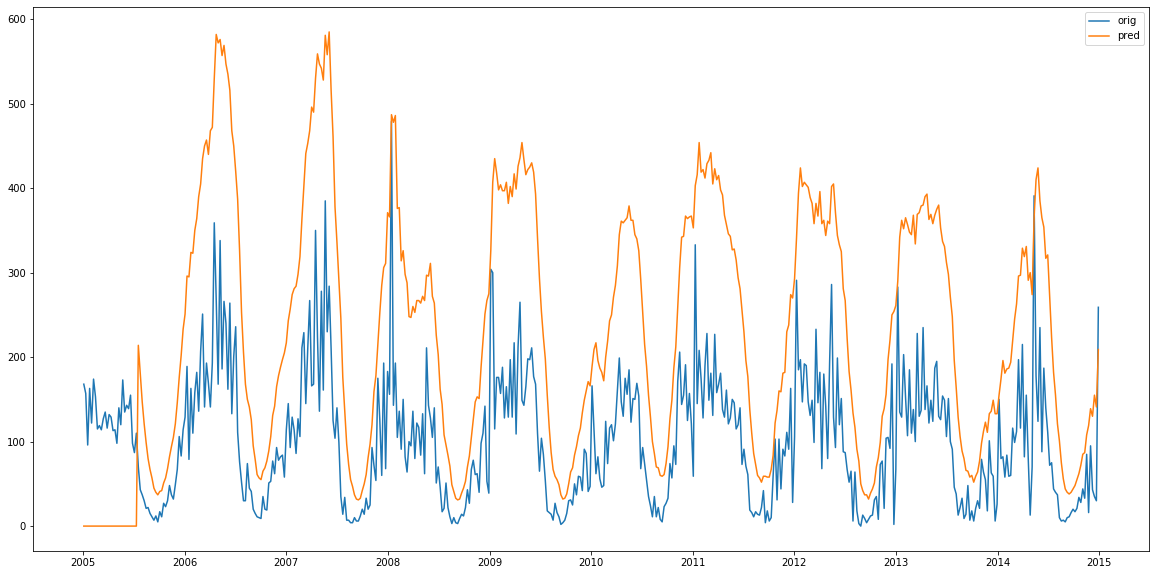

In [15]:
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df[city], label='orig')
ax.plot(df.index, df['pred'], label='pred')
plt.legend(loc='best')

In [16]:
df['error'] = np.abs(df['pred'] - df[city])
err = np.sum(df['error'])
err

73706

In [17]:
b1 = w1
b2 = w2
b3 = w3
b4 = w4

for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            for m in range(1,10):
                
                w1 = i/10
                w2 = j/10
                w3 = k/10
                w4 = m/10
                
                for p in range(28,len(df)):
                    df.iat[p,-2] = (w1*df.iloc[p-1,-3]) + (w2*df.iloc[p-1,-4]) + (w3*df.iloc[p-1,-5])  + (w4*df.iloc[p-1,-6]) / 4
                
                # squared error
                df['error'] = np.abs(df['pred'] - df[city])**2
                new_err = np.sum(df['error'])
                
                if new_err < err:
                    err = new_err
                    b1 = w1
                    b2 = w2
                    b3 = w3
                    b4 = w4
  
for p in range(28,len(df)):
    df.iat[p,-2] = (b1*df.iloc[p-1,-3]) + (b2*df.iloc[p-1,-4]) + (b3*df.iloc[p-1,-5])  + (b4*df.iloc[p-1,-6]) / 4
                

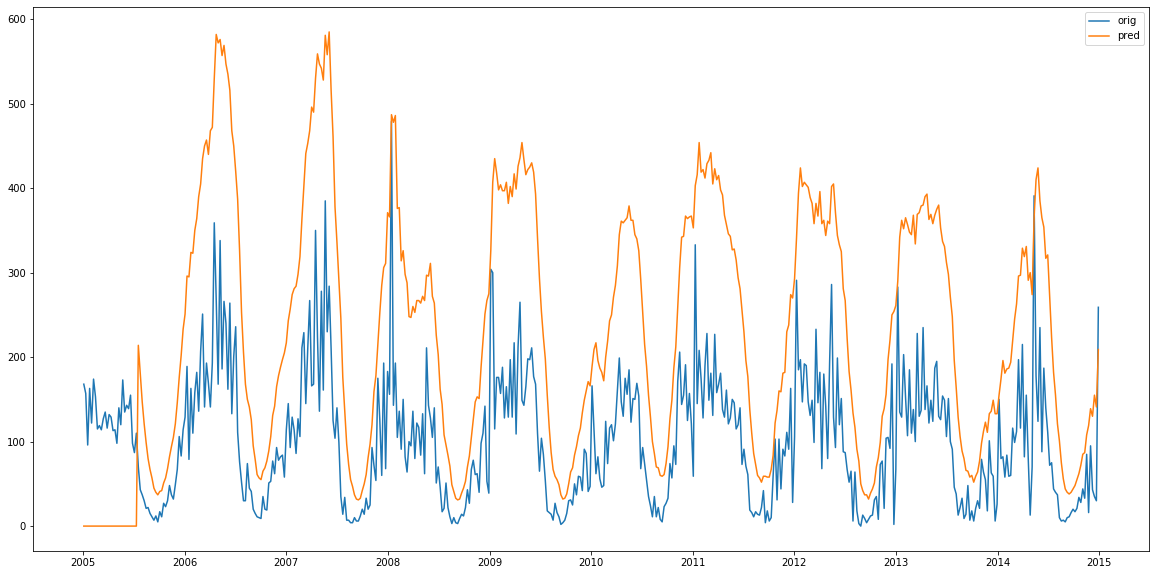

In [18]:
f, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df[city], label='orig')
ax.plot(df.index, df['pred'], label='pred')
plt.legend(loc='best')

In [19]:
print(b1, b2, b3, b4)
print(err)

0.8 0.5 1 0.5
73706


In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings

In [21]:
def adtest(data):
    df_test = adfuller(data, autolag='AIC')
    print('1. ADF = ',df_test[0])
    print('2. P-value = ',df_test[1])
    print('3. Num lags = ',df_test[2])
    print('4. Num obs = ',df_test[3])
    print('5. Crit vals = ')
    for key, val in df_test[4].items():
        print('\t',key,':',val)
        
# check for small p-value
adtest(df[city])

1. ADF =  -6.933218014746708
2. P-value =  1.0708269234621126e-09
3. Num lags =  12
4. Num obs =  509
5. Crit vals = 
	 1% : -3.443262740636999
	 5% : -2.8672350350046787
	 10% : -2.569803239025633


In [22]:
# figure out order for arima model
warnings.filterwarnings('ignore')

stepwise_fit = auto_arima(df[city], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5583.946, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6010.520, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5737.392, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5862.851, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6538.774, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5626.239, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5630.724, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5583.445, Time=0.83 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5625.054, Time=0.45 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=5627.900, Time=0.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5582.143, Time=0.85 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5619.411, Time=0.40 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=5622.595, Time=0.45 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  522
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -2784.071
Date:                Mon, 24 May 2021   AIC                           5582.143
Time:                        18:26:37   BIC                           5611.946
Sample:                             0   HQIC                          5593.816
                                - 522                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4614      0.183      8.000      0.000       1.103       1.819
ar.L1          1.9560      0.020     99.388      0.000       1.917       1.995
ar.L2         -0.9703      0.019    -49.920      0.000      -1.008      -0.932
ma.L1         -1.7754      0.039    -45.581      0.000      -1.852      -1.699
ma.L2          0.8911      0.069     12.907      0.000       0.756       1.026
ma.L3         -0.0944      0.042     -2.239      0.025      -0.177      -0.012
sigma2      2501.8075    101.990     24.530      0.000    2301.912    2701.704
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1465.78
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.78
Prob(H) (two-sided):                  0.86   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(492, 26) (30, 26)


In [24]:
model = ARIMA(train[city], order=(2,0,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               BUDAPEST   No. Observations:                  492
Model:                     ARMA(2, 2)   Log Likelihood               -2626.431
Method:                       css-mle   S.D. of innovations             50.252
Date:                Mon, 24 May 2021   AIC                           5264.862
Time:                        18:26:37   BIC                           5290.053
Sample:                    01-03-2005   HQIC                          5274.754
                         - 06-02-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            103.9346      3.157     32.925      0.000      97.748     110.122
ar.L1.BUDAPEST     1.9615      0.011    181.821      0.000       1.940       1.983
ar.L2.BUDAPEST    -0.9751      0.011    -91.296      0.000      -0.996      -0.954
ma.L1.BUDAPEST    -1.7165      0.034    -51.044      0.000      -1.782      -1.651
ma.L2.BUDAPEST     0.7348      0.033     22.354      0.000       0.670       0.799
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0058           -0.1178j            1.0127           -0.0186
AR.2            1.0058           +0.1178j            1.0127            0.0186
MA.1            1.1115           +0.0000j            1.1115            0.0000
MA.2            1.2243           +0.0000j            1.2243            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
start = len(train)
end = len(df)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2014-06-09    180.495062
2014-06-16    178.478120
2014-06-23    175.500782
2014-06-30    171.627336
2014-07-07    166.932617
2014-07-14    161.500730
2014-07-21    155.423679
2014-07-28    148.799924
2014-08-04    141.732885
2014-08-11    134.329415
2014-08-18    126.698266
2014-08-25    118.948570
2014-09-01    111.188347
2014-09-08    103.523070
2014-09-15     96.054296
2014-09-22     88.878389
2014-09-29     82.085344
2014-10-06     75.757721
2014-10-13     69.969715
2014-10-20     64.786357
2014-10-27     60.262861
2014-11-03     56.444119
2014-11-10     53.364350
2014-11-17     51.046902
2014-11-24     49.504208
2014-12-01     48.737884
2014-12-08     48.738982
2014-12-15     49.488374
2014-12-22     50.957261
2014-12-29     53.107807
Freq: W-MON, dtype: float64


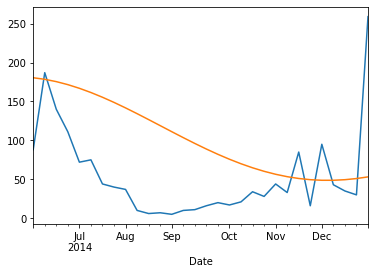

In [26]:
test[city].plot()
pred.plot()
